<a href="https://colab.research.google.com/github/String-ru/AIFFEL_quest_cr/blob/main/Tensorflow/%EC%84%A4%EB%82%A0%EC%97%B0%ED%9C%B4%EA%B3%B5%EB%B6%80_Chap3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))
print(x)

x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


In [44]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[-0.8191254 ]
 [ 0.19985662]
 [-0.37534466]], shape=(3, 1), dtype=float32)
tf.Tensor(
[[0.16392839]
 [0.06984568]
 [0.47732818]], shape=(3, 1), dtype=float32)


In [45]:
import numpy as np

x = np.ones(shape=(2, 2))
x[0, 0] = 0.
print(x)

[[0. 1.]
 [1. 1.]]


In [46]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.4135894],
       [-2.3457873],
       [ 1.2827126]], dtype=float32)>


In [47]:
v.assign(tf.ones((3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>


In [48]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [49]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

In [50]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
    result = tf.square(input_var)
gradient = tape.gradient(result, input_var)
print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


In [51]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
    tape.watch(input_const)
    result = tf.square(input_const)
gradient = tape.gradient(result, input_const)
print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


In [52]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position = 4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)
print(speed)
print(acceleration)

tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(9.8, shape=(), dtype=float32)


In [53]:
# time = tf.Variable(0.)
# position = 4.9 * time ** 2

# with tf.GradientTape() as inner_tape:
#   speed = inner_tape.gradient(position, time)

# with tf.GradientTape() as outer_tape:
#   acceleration = outer_tape.gradient(speed, time)

# print(speed)
# print(acceleration)

In [54]:
time = tf.Variable(0.)

with tf.GradientTape(persistent=True) as tape:
  position = 4.9 * time ** 2
  speed = tape.gradient(position, time)

acceleration = tape.gradient(speed, time)

print(speed)  # 0.0
print(acceleration)  # 9.8

del tape

tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(9.8, shape=(), dtype=float32)


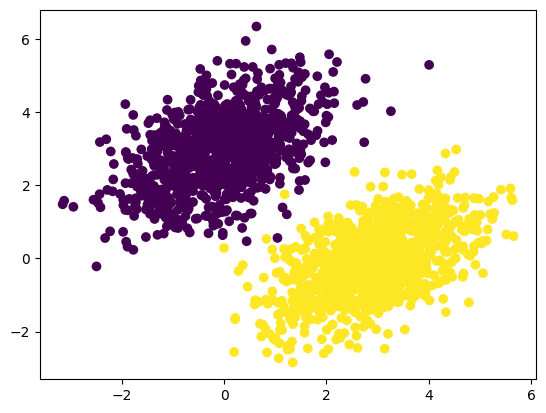

In [55]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

import matplotlib.pyplot as plt

plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [56]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim, )))

def model(inputs):
  return tf.matmul(inputs, W) + b

def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses)

learning_rate = 0.1

def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(targets, predictions)
  grad_loss_w, grad_loss_b = tape.gradient(loss, [W, b])
  W.assign_sub(learning_rate * grad_loss_w)
  b.assign_sub(learning_rate * grad_loss_b)
  return loss

for step in range(400):
  loss = training_step(inputs, targets)
  # print(f"{step}번째 스텝의 손실: {loss: 4f}")

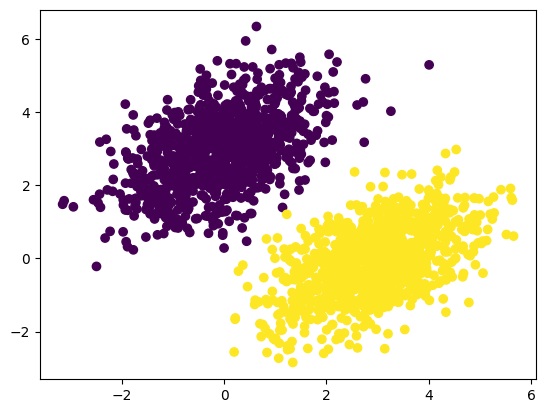

In [57]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

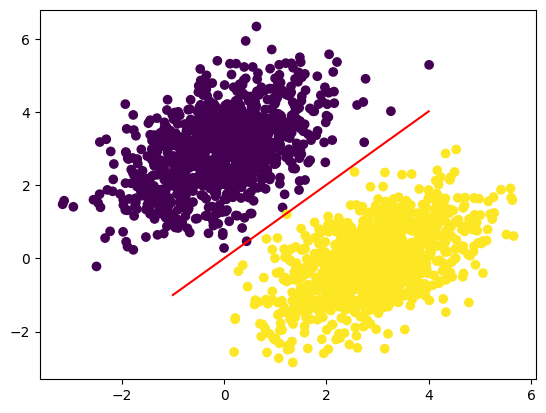

In [58]:
x = np.linspace(-1, 4, 100)
y = - W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

In [9]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):
  def __init__(self, units, activation=None):
    super().__init__()
    self.units = units
    self.activation = activation

  def build(self, input_shape):
    input_dim = input_shape[-1]
    self.W = self.add_weight(shape=(input_dim, self.units),
                             initializer="random_normal")
    self.b = self.add_weight(shape=(self.units, ),
                             initializer="zeros")

  def call(self, inputs):
    y = tf.matmul(inputs, self.W) + self.b
    if self.activation is not None:
      y = self.activation(y)
    return y

In [14]:
import tensorflow as tf

# SimpleLinear 레이어 생성
my_dense = SimpleDense(units=32, activation=tf.nn.relu)

# 입력 데이터 생성
input_tensor = tf.ones(shape=(2, 784))

# 레이어 호출
output_tensor = my_dense(input_tensor)

# 출력 출력
print(output_tensor.shape)

(2, 32)


In [25]:
from tensorflow import keras
from tensorflow.keras import layers

# layer = layers.Dense(32, activation="relu")

# from tensorflow.keras import models
# from tensorflow.keras import layers

# model = models.Sequential([
#     layers.Dense(32, activation="relu"),
#     layers.Dense(32)
# ])

# NaiveSequential 클래스 정의 (예시)
class NaiveSequential(keras.Model):
  def __init__(self, layers):
    super().__init__()
    self._layers = layers

  def call(self, inputs):
    x = inputs
    for layer in self._layers:
      x = layer(x)
    return x

# NaiveDense 클래스 정의 (예시)
class NaiveDense(keras.layers.Layer):
  def __init__(self, input_size, output_size, activation=None):
    super().__init__()
    self.input_size = input_size
    self.output_size = output_size
    self.activation = activation
    self.W = tf.Variable(tf.random.normal([input_size, output_size]))
    self.b = tf.Variable(tf.zeros([output_size]))

  def call(self, inputs):
    y = tf.matmul(inputs, self.W) + self.b
    if self.activation is not None:
      y = self.activation(y)
    return y

model = NaiveSequential([
    NaiveDense(input_size=784, output_size=32, activation="relu"),
    NaiveDense(input_size=32, output_size=64, activation="relu"),
    NaiveDense(input_size=64, output_size=32, activation="relu"),
    NaiveDense(input_size=32, output_size=10, activation="softmax")
])

# def__call__(self, inputs):
#   if not self.built:
#     self.build(inputs.shape)
#     self._built = True
#   return self.call(inputs)

# model = keras.Sequential([
#     layers.Dense(32, activation="relu"),
#     layers.Dense(64, activation="relu"),
#     layers.Dense(32, activation="relu"),
#     layers.Dense(10, activation="softmax")
# ])

In [28]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

# model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-4),
#               loss=my_custom_loss,
#               metrics=[my_custom_metric_1, my_custom_metric_2])

In [32]:
import numpy as np

# 입력 데이터와 타겟 데이터 생성 (예시)
inputs = np.random.rand(1000, 784)  # 1000개의 샘플, 784개의 특징
targets = np.random.randint(0, 10, size=(1000, 1))  # 1000개의 샘플, 0~9 사이의 정수 레이블

# 모델 학습
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128,
)

Epoch 1/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.0794 - loss: 8.5120  
Epoch 2/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.0840 - loss: 8.5751  
Epoch 3/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 0.0796 - loss: 8.5972  
Epoch 4/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - binary_accuracy: 0.0903 - loss: 8.4587  
Epoch 5/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 0.0764 - loss: 8.0839 


In [33]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets),
)

Epoch 1/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - binary_accuracy: 0.0713 - loss: 1199.7711 - val_binary_accuracy: 0.1100 - val_loss: 29.6741
Epoch 2/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.0865 - loss: 305.8037 - val_binary_accuracy: 0.0967 - val_loss: 423.7603
Epoch 3/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.0634 - loss: 353.7296 - val_binary_accuracy: 0.0967 - val_loss: 453.2359
Epoch 4/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.0729 - loss: 380.5418 - val_binary_accuracy: 0.0967 - val_loss: 535.3933
Epoch 5/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.1023 - loss: 415.9880 - val_binary_accuracy: 0.0967 - val_loss: 285.4354


In [37]:
# predictions = model(new_inputs)

import numpy as np

# 새로운 입력 데이터 생성 (예시)
new_inputs = np.random.rand(100, 784)  # 100개의 새로운 샘플, 784개의 특징

# 예측 수행
predictions = model.predict(new_inputs, batch_size=128)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


In [38]:
#Tensorflow = 수치 컴퓨팅 프레임워크 (그래디언트 자동 계산, 배포, 변환 가능)
#Keras = Tensorflow에서 deeplearning을 수행하는 표준 API(application programming interface)
#: 어플과 어플 사이 or 컴퓨터와 컴퓨터 사이 연결해주는 역할
#(이 책에서 사용하는 라이브러리)
#Layer = Keras의 핵심 Class로서, 가중치와 연산을 캡슐화함.
#Layer들을 조합하여 model을 만듦
#model을 훈련하기 전, 옵티마이저/손실/측정 지표를 선택하여 model.compile()메서드에 지정
#fit()메서드 = mini batch 경사 하강법 실행
#: 검증data에 대한 손실과 츨정 지표 확인 가능
#모델 훈련하고 나면 model.predict()메서드 사용하여 new_input애 대한 예측 만듦